# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Loading Packages </p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/lending-club-loan-data-analysis/loan_data.csv")

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Data Overview</p>



In [3]:
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
data.isnull().sum().sum()

0

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Feature Engineering</p>


**The only categorical column in this dataset is *purpose* and since it is a feature that cannot be ignored we are converting it into numerical type or discrete to deal with.**

In [7]:
cat_features = ["purpose"]
final_data = pd.get_dummies(data=data,columns=cat_features,drop_first=True)#Drop first will also drop the 
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [8]:
final_data.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Exploratory Data Analysis</p>

<Axes: >

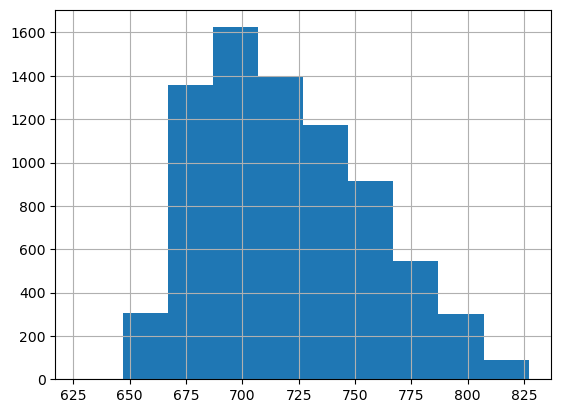

In [9]:
data[data["credit.policy"]==1]["fico"].hist()

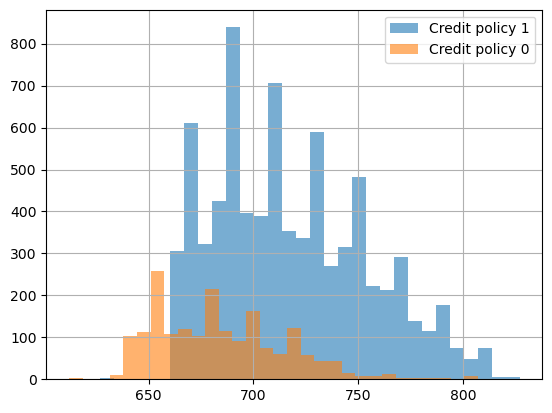

In [10]:
data[data["credit.policy"]==1]["fico"].hist(bins=30,alpha=0.6,label="Credit policy 1")
data[data["credit.policy"]==0]["fico"].hist(bins=30,alpha=0.6,label="Credit policy 0")
plt.legend()
#lets increase the bins

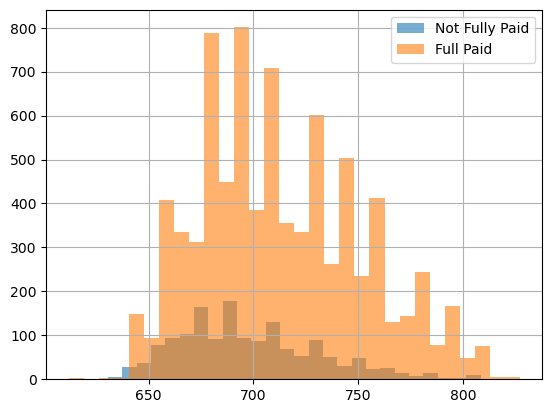

In [11]:
data[data["not.fully.paid"]==1]["fico"].hist(bins=30,alpha=0.6,label="Not Fully Paid")
data[data["not.fully.paid"]==0]["fico"].hist(bins=30,alpha=0.6,label="Full Paid")
plt.legend()
#lets increase the bins

<Axes: xlabel='purpose', ylabel='count'>

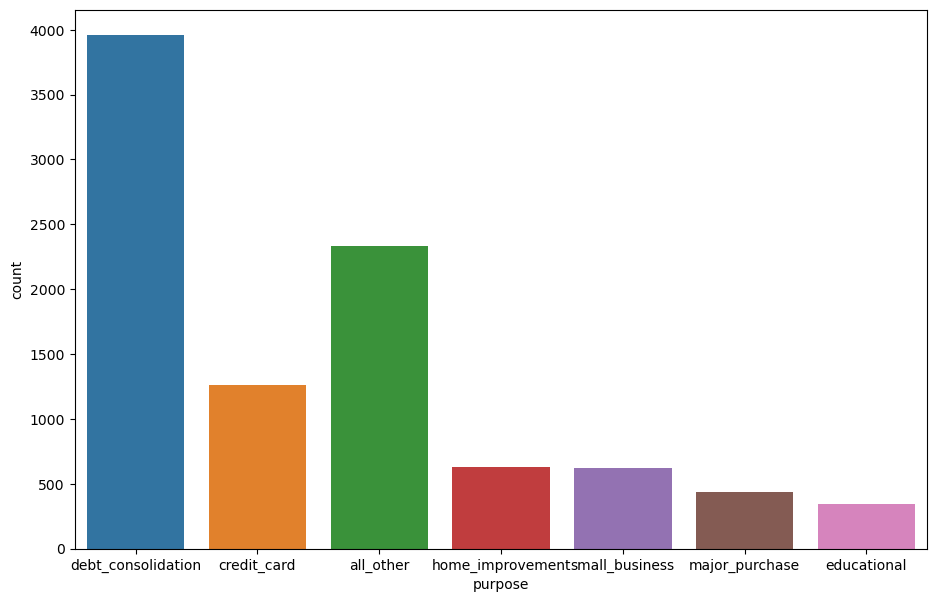

In [12]:
plt.figure(figsize=(11,7))
sns.countplot(data=data,x="purpose")

<Axes: xlabel='purpose', ylabel='count'>

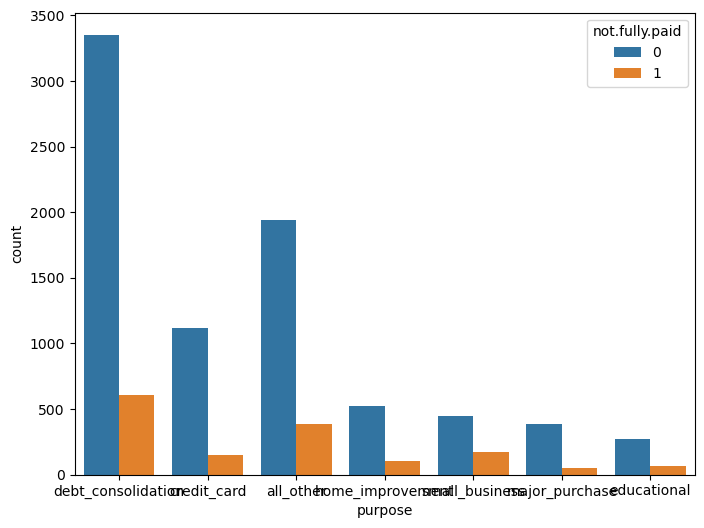

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x="purpose",hue="not.fully.paid")

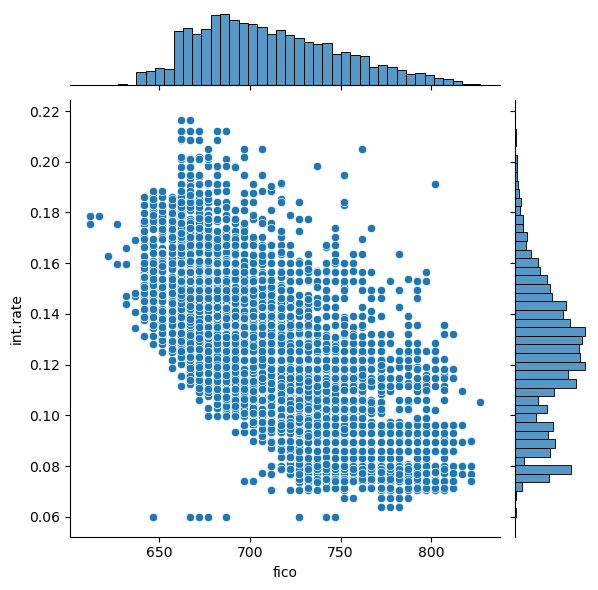

In [14]:
sns.jointplot(x="fico",y="int.rate",data=data)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1100x700 with 0 Axes>

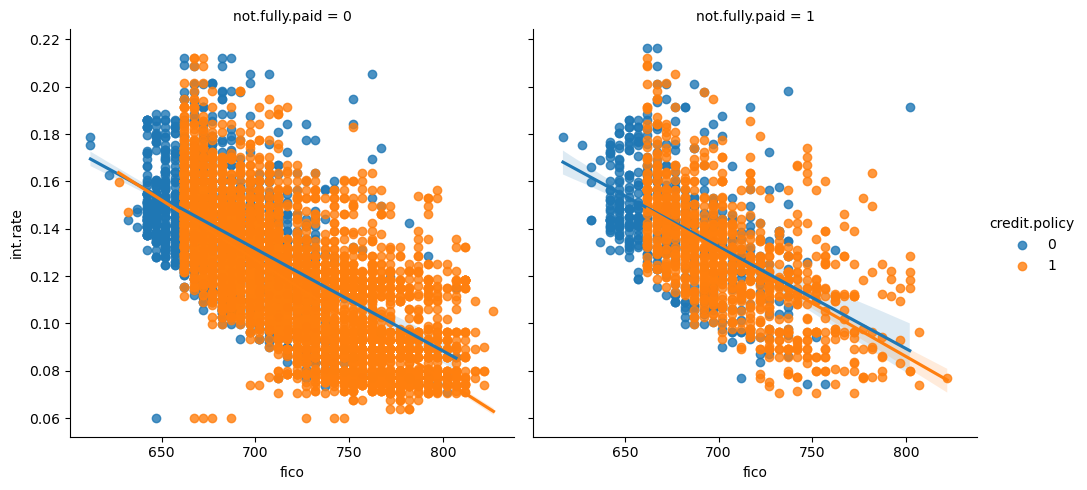

In [15]:
plt.figure(figsize=(11,7))
sns.lmplot(x="fico",y="int.rate",data=data,hue="credit.policy",col="not.fully.paid")

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;"> Model Evaluation </p>

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Train Test Split </p>


In [16]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Model Training </p>

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Evaluation Matrix</p> 


In [18]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1986  445]
 [ 338  105]]


## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Confusion Matrix</p>

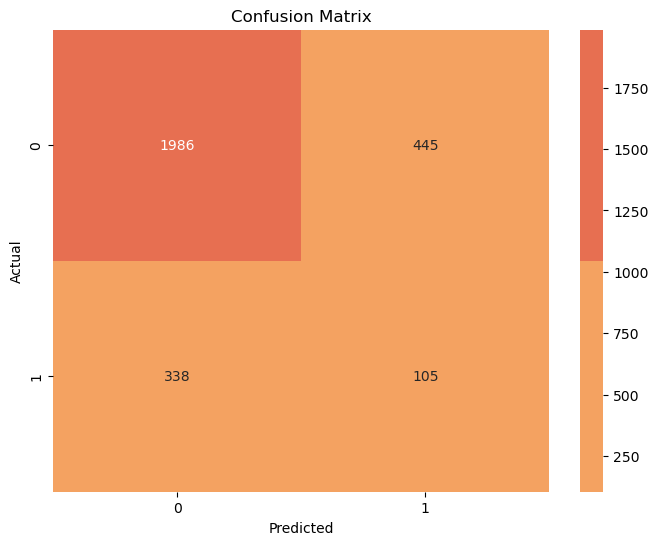

In [19]:
y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=['#F4A261','#E76F51'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()